In [20]:
import pandas as pd

# Cargar el archivo CSV
data = pd.read_csv('../bank-full.csv', sep=';')

# Mostrar las primeras filas del DataFrame
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
#duplicados
duplicates = data.duplicated()
print(f'Número de duplicados: {duplicates.sum()}')

Número de duplicados: 0


Podemos observar, que la base de datos NO tiene duplicados. Lo cuál es bueno, ya que se tiene información robusta para alimentar el modelo

In [10]:
# Exploración inicial de los datos
# 1. Ver información general y primeras filas
display(data.info())  # Información sobre el tipo de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

En este caso, podemos observar que la base de datos no contiene nulos. Lo cuál es un buen indicador. Ahora vamos a validar que el contenido de cada columna sea acorde al diccionario.

In [11]:
#valores unique para cada columna
print('Valores únicos por columna:')
for col in data.columns:
    print(f'{col}: {data[col].unique()}')


Valores únicos por columna:
age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
balance: [ 2143    29     2 ...  8205 14204 16353]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 261  151   76 ... 1298 1246 1556]
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 

De momento, parece ser que los datos se compartan acorde al diccionario. Sin embargo, se realizara un analisis para ver si hay anomalos en las variables numericas. 

In [12]:
# Definir el umbral (90% en este caso)
threshold = 0.9

# Identificar columnas que tienen un valor predominante en al menos el 90% de las filas
constant_columns = []
for col in data.columns:
    top_freq = data[col].value_counts(normalize=True).iloc[0]  # Frecuencia del valor más común
    if top_freq >= threshold:
        constant_columns.append((col, top_freq))

# Mostrar resultados
if constant_columns:
    print("Columnas que tienen un único valor en el 90% o más de las filas:")
    for col, freq in constant_columns:
        print(f"Columna '{col}': {freq*100:.2f}% del mismo valor")
else:
    print("No hay columnas con un único valor predominante en el 90% o más de las filas.")


Columnas que tienen un único valor en el 90% o más de las filas:
Columna 'default': 98.20% del mismo valor


Podemos observar que la columna default, la cuál indica si ha habido incumplimiento de venta, para el 98.2% de los clientes se ve que han cumplido con los pagos. Decide no eliminarse esta columna, ya que puede ser un indicador que se puede relacionar con otras caracteristicas del cliente para después predecir incumplimiento o no. Sin embargo, se hará un analisis de correlación para cuantificar estas relaciones

C:\Users\lunit\AppData\Local\Temp\ipykernel_4384\3388498322.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


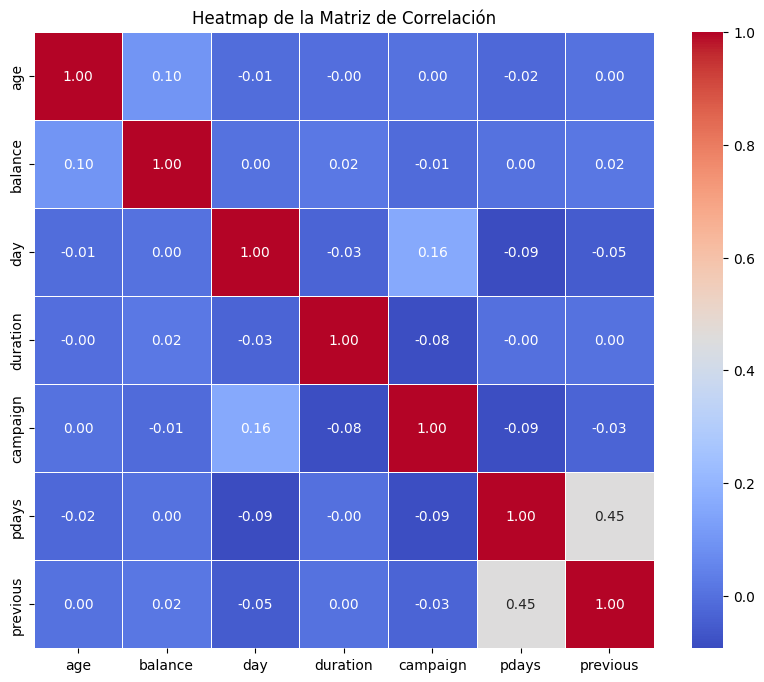

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

Aquí podemos observar que hay una baja correlación lineal entre las variables, lo que nuevamente indica que tenemos datos robustos para alimentar el modelo

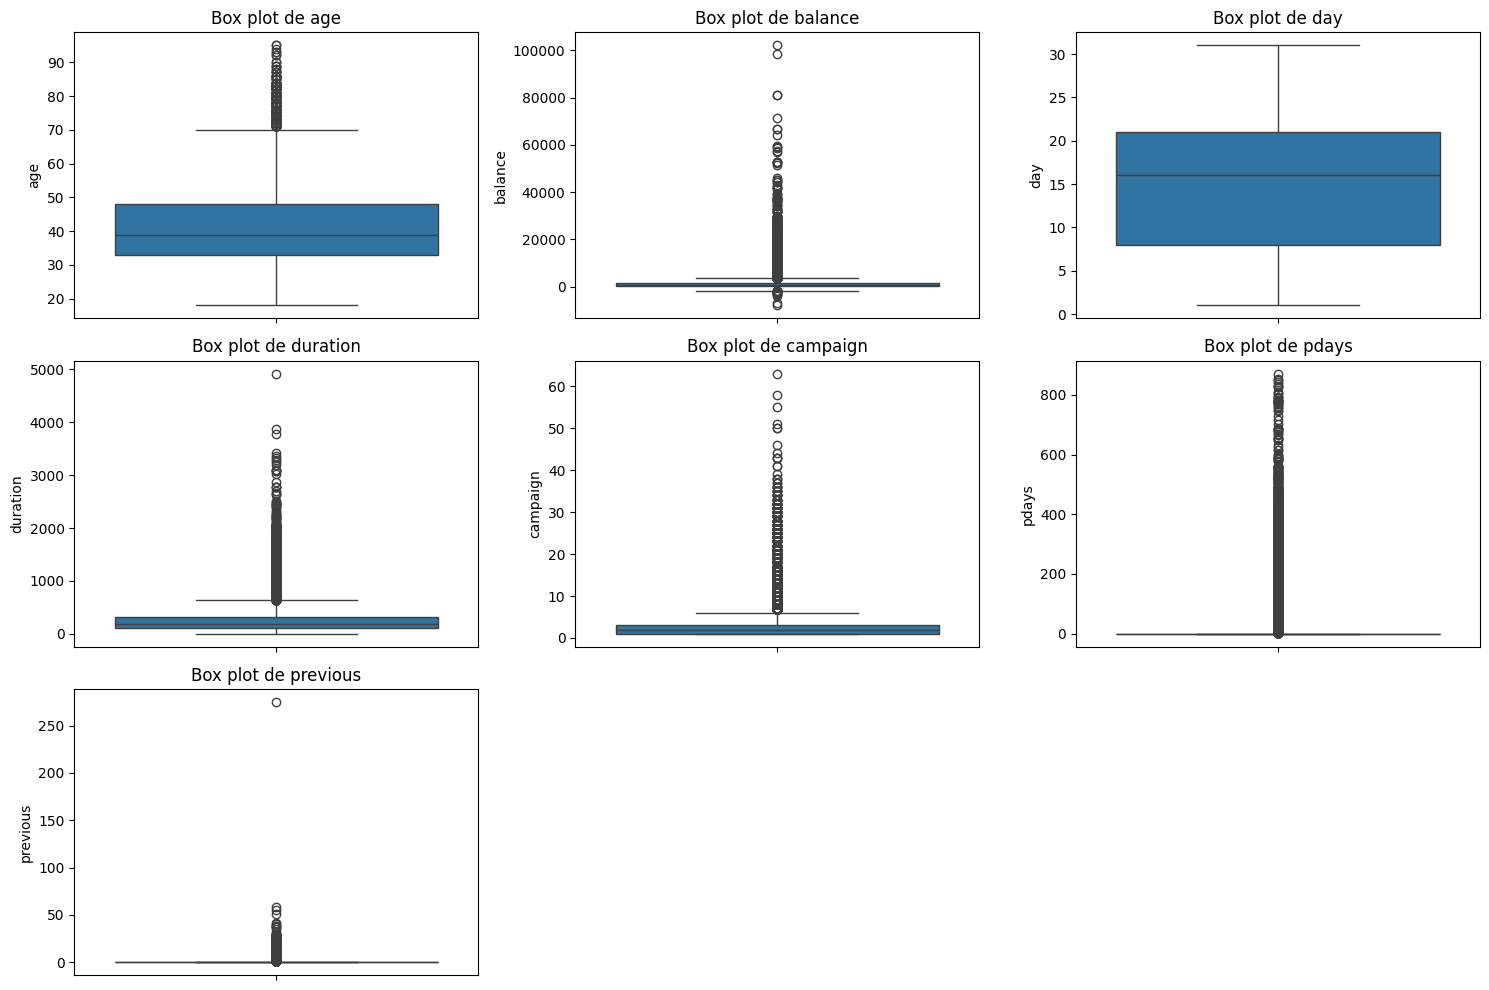

In [15]:
# Crear un box plot para cada columna numérica
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot de {col}')
    plt.tight_layout()

plt.show()

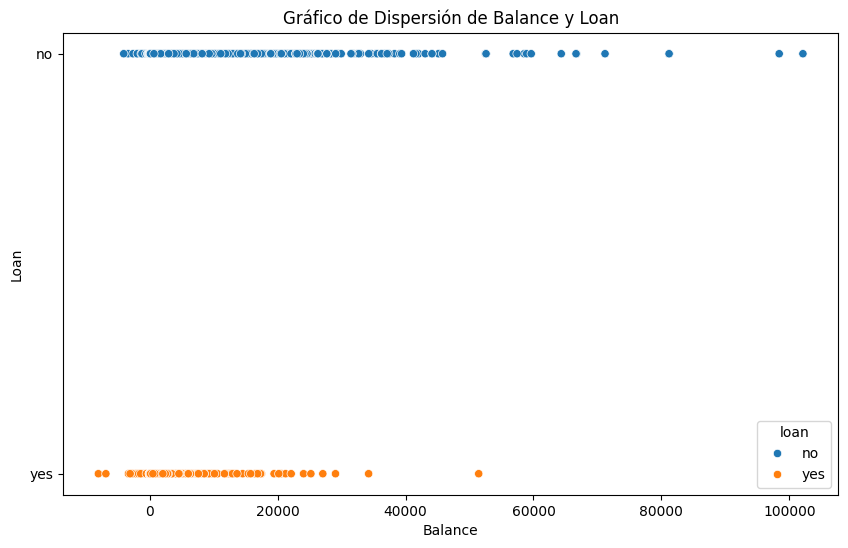

In [17]:
# Crear un gráfico de dispersión para balance y loan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='balance', y='loan', hue='loan')
plt.title('Gráfico de Dispersión de Balance y Loan')
plt.xlabel('Balance')
plt.ylabel('Loan')
plt.show()

In [18]:
#validar que todos sean mayores de edad
print('Edad mínima:', data['age'].min())

Edad mínima: 18


En este caso poedemos ver que los datos se comportan con normalidad. Por lo que se procedera a convertir las categorias en dummies. Y esto sera el sera el procesamiento final que se le hara a los datos.

In [21]:
#convierte en dummies las variables categóricas
import pandas as pd

# Supongamos que 'data' es tu DataFrame y tienes algunas columnas categóricas
# Puedes convertir todas las columnas categóricas en dummies de esta manera:
data_dummies = pd.get_dummies(data, drop_first=True)

# Visualizar los primeros registros con las columnas dummy
data_dummies.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
#print cols data_dummies
print(data_dummies.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [23]:
# Guardar el DataFrame data_dummies en un archivo CSV separado por ";"
data_dummies.to_csv('data_dummies.csv', sep=';', index=False)